In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pickle

In [2]:
dfGCBD = pd.read_pickle('./Expanded_SST_with_features_fixed.pkl')

# Modeling Coral Bleaching from GCBD Data
Loading in data and getting in correct format

In [3]:
# df = pd.read_csv('./Full_GCBD_Meshed.csv')
# df.shape
df1 = pd.read_pickle('./Expanded_SST_with_features_fixed.pkl')
df1 = df1[['index','lat','long','Percent_Bleached_Sum','day','month','year','sur_refl_b08',
       'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11', 'sur_refl_b12',
       'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15', 'sur_refl_b16', 'Blue',
       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI', 'NDWIns',
       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'datetime_landsat',
       'datetime_landsat_offset', 'datetime']]
df1.columns

Index(['index', 'lat', 'long', 'Percent_Bleached_Sum', 'day', 'month', 'year',
       'sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11',
       'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15',
       'sur_refl_b16', 'Blue', 'Green', 'Red', 'Near Infrared',
       'Shortwave Infrared 1', 'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh',
       'AWEIsh', 'LSWI', 'MBWI', 'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR',
       'NDVIMNDWI', 'NDWI', 'NDWIns', 'NWI', 'SWM', 'WI1', 'WI2', 'WRI',
       'datetime_landsat', 'datetime_landsat_offset', 'datetime'],
      dtype='object')

Sea Surface Data - from Sea Surface Temperature Feature Extraction Notebook

In [4]:
df_new = pd.read_csv('ModisDataFull.csv')
#df_new = pd.read_csv('ModisDataFull_test.csv')
df_new = df_new.drop(['Percent_Bleached_Sum','day','month','year'],axis=1)
df_new=df_new.fillna(0)

Chlor_A, POC & NFLH data

In [5]:
dfM = pd.read_pickle('./dfGCBDModis.pkl')
dfM = dfM.drop(['Percent_Cover_Sum','Percent_Bleached_Sum','Latitude_Degrees','Longitude_Degrees','Date','time_span'],axis=1)
dfM.reset_index(inplace=True)
dfM=dfM.fillna(0)
#dfM.isna().sum()
#len(dfM[dfM.isna().any(axis=1)])
dfM = dfM.drop(['day','month','year'],axis=1)
dfM

index  chlor_a  chlor_avg  chlor_change  chlor_max  chlor_min  nflh  \
0       708      0.0    0.00000           0.0    0.00000    0.00000   0.0   
1       709      0.0    0.00000           0.0    0.00000    0.00000   0.0   
2       711      0.0    0.00000           0.0    0.00000    0.00000   0.0   
3       712      0.0    0.00000           0.0    0.00000    0.00000   0.0   
4       713      0.0    0.00000           0.0    0.00000    0.00000   0.0   
...     ...      ...        ...           ...        ...        ...   ...   
7324  38027      0.0    0.00000           0.0    0.00000    0.00000   0.0   
7325  38028      0.0    0.23914           0.0    0.23914    0.23914   0.0   
7326  38029      0.0    0.00000           0.0    0.00000    0.00000   0.0   
7327  38030      0.0    0.00000           0.0    0.00000    0.00000   0.0   
7328  38031      0.0    0.00000           0.0    0.00000    0.00000   0.0   

      nflh_avg  nflh_change  nflh_max  nflh_min  poc  poc_avg  poc_change  \
0        0.000          0.0     0.000     0.000  0.0      0.0         0.0   
1        0.000          0.0     0.000     0.000  0.0      0.0         0.0   
2        0.000          0.0     0.000     0.000  0.0      0.0         0.0   
3        0.000          0.0     0.000     0.000  0.0      0.0         0.0   
4        0.000          0.0     0.000     0.000  0.0      0.0         0.0   
...        ...          ...       ...       ...  ...      ...         ...   
7324     0.000          0.0     0.000     0.000  0.0      0.0         0.0   
7325     0.023          0.0     0.023     0.023  0.0     70.0         0.0   
7326     0.000          0.0     0.000     0.000  0.0      0.0         0.0   
7327     0.000          0.0     0.000     0.000  0.0      0.0         0.0   
7328     0.000          0.0     0.000     0.000  0.0      0.0         0.0   

      poc_max  poc_min  
0         0.0      0.0  
1         0.0      0.0  
2         0.0      0.0  
3         0.0      0.0  
4         0.0      0.0  
...       ...      ...  
7324      0.0      0.0  
7325     70.0     70.0  
7326      0.0      0.0  
7327      0.0      0.0  
7328      0.0      0.0  

[7329 rows x 16 columns]

Merge the three data sources together

In [6]:
df1=pd.merge(df1,df_new,on='index',how='left')
df1=pd.merge(df1,dfM,on='index',how='left')
df1 = df1.drop_duplicates()
df1

index        lat        long  Percent_Bleached_Sum day month  year  \
0         0  24.366926  124.003372                  74.7  08    09  2016   
1         5  24.483712  124.123192                  74.7  01    10  2016   
2        16  26.440547  127.777154                  32.5  21    08  2013   
3        27  26.532637  128.074751                  32.5  11    09  2016   
4        42  32.777267  132.870262                   5.0  10    08  2016   
...     ...        ...         ...                   ...  ..   ...   ...   
4748  38043  12.028167  -61.783111                   0.0  18    03  2015   
4749  38044  12.045639  -61.764917                   0.0  26    03  2015   
4750  38045  12.045639  -61.764917                   0.0  26    03  2015   
4751  38046  12.041444  -61.770944                   0.0  11    03  2015   
4752  38047  12.041444  -61.770944                   0.0  11    03  2015   

      sur_refl_b08  sur_refl_b09  sur_refl_b10  ...  nflh  nflh_avg  \
0            975.0         915.0         877.0  ...   NaN       NaN   
1            231.0         312.0         464.0  ...   NaN       NaN   
2            372.0         371.0         419.0  ...   NaN       NaN   
3            340.0         332.0         337.0  ...   NaN       NaN   
4            494.0         367.0         359.0  ...   NaN       NaN   
...            ...           ...           ...  ...   ...       ...   
4748         359.0         344.0         377.0  ...   NaN       NaN   
4749         138.0         141.0         126.0  ...   NaN       NaN   
4750         138.0         141.0         126.0  ...   NaN       NaN   
4751         297.0         250.0         227.0  ...   NaN       NaN   
4752         297.0         250.0         227.0  ...   NaN       NaN   

      nflh_change  nflh_max  nflh_min  poc  poc_avg  poc_change  poc_max  \
0             NaN       NaN       NaN  NaN      NaN         NaN      NaN   
1             NaN       NaN       NaN  NaN      NaN         NaN      NaN   
2             NaN       NaN       NaN  NaN      NaN         NaN      NaN   
3             NaN       NaN       NaN  NaN      NaN         NaN      NaN   
4             NaN       NaN       NaN  NaN      NaN         NaN      NaN   
...           ...       ...       ...  ...      ...         ...      ...   
4748          NaN       NaN       NaN  NaN      NaN         NaN      NaN   
4749          NaN       NaN       NaN  NaN      NaN         NaN      NaN   
4750          NaN       NaN       NaN  NaN      NaN         NaN      NaN   
4751          NaN       NaN       NaN  NaN      NaN         NaN      NaN   
4752          NaN       NaN       NaN  NaN      NaN         NaN      NaN   

      poc_min  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
4748      NaN  
4749      NaN  
4750      NaN  
4751      NaN  
4752      NaN  

[4753 rows x 73 columns]

Plot the records presented in the Global Coral Data Atlas and available from constructed features

In [7]:
import plotly.express as px

fig = px.scatter_geo(df1,lat='lat',lon='long')
fig.update_layout(title = 'Distribution of Global Coral Bleaching Data', title_x=0.5)
fig.show()

Region specific models perform better than global. Below are some possible regions

In [8]:
tot = len(df1)
gbr=len(df1.loc[(((df1['long']> 142.69) & (df1['long']<180) & (df1['lat']>-28.7)&(df1['lat']<-10)))]) #GBR
car=len(df1.loc[((df1['long']> -100) & (df1['long']<-50) & (df1['lat']>5)&(df1['lat']<30))]) #CAR
scs = len(df1.loc[((df1['long']> 99) & (df1['long']<130) & (df1['lat']>-10)&(df1['lat']<15))]) #SCS
jpn = len(df1.loc[((df1['long']> 100) & (df1['long']<150) & (df1['lat']>15)&(df1['lat']<100))]) #SCS
print('Total:',tot)
print('GBR:',gbr)
print('CAR:',car)
print('SCS:',scs)
print('JPN:',jpn)

Total: 4753
GBR: 568
CAR: 1162
SCS: 1962
JPN: 273


The model in this notebook will focus on the Caribbean as it has the highest density of records

In [9]:
#df = df1
#df = df1.loc[(((df1['long']> 142.69) & (df1['long']<153.7) & (df1['lat']>-28.7)&(df1['lat']<-10)))] #GBR
#df = df1.loc[(((df1['long']> 142.69) & (df1['long']<180) & (df1['lat']>-28.7)&(df1['lat']<-10)))] #GBR Expanded
#df = df1.loc[((df1['long']> 99) & (df1['long']<130) & (df1['lat']>-10)&(df1['lat']<15))]
df = df1.loc[((df1['long']> -85) & (df1['long']<-63) & (df1['lat']>17)&(df1['lat']<27))] #CAR
#df = df1.loc[((df1['long']> -85) & (df1['long']<-61) & (df1['lat']>15)&(df1['lat']<30))] #CAR Expanded

In [10]:
#Columns to train on
df.columns

Index(['index', 'lat', 'long', 'Percent_Bleached_Sum', 'day', 'month', 'year',
       'sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10', 'sur_refl_b11',
       'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14', 'sur_refl_b15',
       'sur_refl_b16', 'Blue', 'Green', 'Red', 'Near Infrared',
       'Shortwave Infrared 1', 'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh',
       'AWEIsh', 'LSWI', 'MBWI', 'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR',
       'NDVIMNDWI', 'NDWI', 'NDWIns', 'NWI', 'SWM', 'WI1', 'WI2', 'WRI',
       'datetime_landsat', 'datetime_landsat_offset', 'datetime', 'Unnamed: 0',
       'Latitude_Degrees', 'Longitude_Degrees', 'lat_Rnd', 'lon_Rnd',
       'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
       'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp', 'sst_dhw', 'sst_dhw_age',
       'chlor_a', 'chlor_avg', 'chlor_change', 'chlor_max', 'chlor_min',
       'nflh', 'nflh_avg', 'nflh_change', 'nflh_max',

The column 'index' is not a feature to study on. Chlor_a, NFLH and poc are all nulls so they are dopped.

In [11]:
coral_bleaching_cols = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10',
       'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14',
       'sur_refl_b15', 'sur_refl_b16', 'Blue',
       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI', 'NDWIns',
       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'datetime_landsat',
                        'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
       'sst_dhw','sst_dhw_age',
        'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp', 'datetime',
       'chlor_avg', 'chlor_change', 'chlor_max', 'chlor_min',
       'nflh_avg', 'nflh_change', 'nflh_max', 'nflh_min',
       'poc_avg', 'poc_change', 'poc_max', 'poc_min',
       'Percent_Bleached_Sum']
df_bleaching = df[coral_bleaching_cols]

In [12]:
from math import ceil
def train_test_split_sorted(X, y, test_size, dates):
    """
    Function to perform temporal train test split 
    """
    n_test = ceil(test_size * len(X))

    sorted_index = [x for _, x in sorted(zip(np.array(dates), np.arange(0, len(dates))), key=lambda pair: pair[0])]
    train_idx = sorted_index[:-n_test]
    test_idx = sorted_index[-n_test:]

    if isinstance(X, (pd.Series, pd.DataFrame)):
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]
    else:
        X_train = X[train_idx]
        X_test = X[test_idx]
    if isinstance(y, (pd.Series, pd.DataFrame)):
        y_train = y.iloc[train_idx]
        y_test = y.iloc[test_idx]
    else:
        y_train = y[train_idx]
        y_test = y[test_idx]

    return X_train, X_test, y_train, y_test

Splitting data into train, validation, test. This **is** a temporal train/test split because this dataset contains multiple observations in the same location over time

In [13]:
X_train, X_test, y_train, y_test = train_test_split_sorted(df_bleaching.drop(['Percent_Bleached_Sum'], axis=1), df_bleaching['Percent_Bleached_Sum'] / 100, 0.2, df_bleaching['datetime'])
X_train, X_val, y_train, y_val = train_test_split_sorted(X_train, y_train, 0.2, X_train['datetime'])

X_train_year = X_train['datetime']
X_train = X_train.drop(['datetime', 'datetime_landsat'], axis=1)
X_val = X_val.drop(['datetime', 'datetime_landsat'], axis=1)
X_test = X_test.drop(['datetime', 'datetime_landsat'], axis=1)
print("Rows in taining dataset:",len(X_train))

Rows in taining dataset: 628


Training XGBoost Regression Model to predict "Percent Bleached"

In [14]:
from xgboost import XGBRegressor
xgb_bleaching = XGBRegressor(objective="reg:logistic", random_state=42, reg_alpha=.05, reg_lambda=.05, max_depth=10, n_estimators=400, learning_rate=0.1, early_stopping_rounds=10, eval_metric='rmse')
xgb_bleaching.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

[20:00:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=16,
             num_parallel_tree=1, objective='reg:logistic', random_state=42,
             reg_alpha=0.05, reg_lambda=0.05, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Understanding the data being trained on including differences in temporal train/validation/test populations

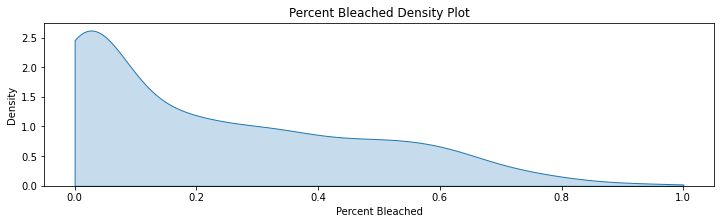

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 3)
sns.kdeplot(y_train, shade=True, label='Predicted', levels=5, clip=(0.0, 1.0))

plt.xlabel('Percent Bleached')
plt.ylabel('Density')
plt.title('Percent Bleached Density Plot')
plt.show()

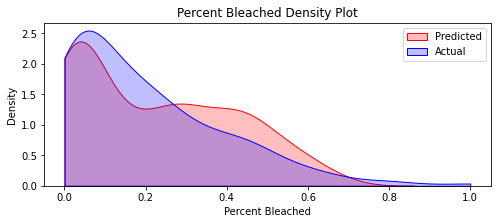

In [16]:
preds = xgb_bleaching.predict(X_val)
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
sns.kdeplot(preds, shade=True, label='Predicted', levels=5, clip=(0.0, 1.0), color='red')
sns.kdeplot(y_val, shade=True, label='Actual', levels=5, clip=(0.0, 1.0), color='blue')
plt.legend()
plt.xlabel('Percent Bleached')
plt.ylabel('Density')
plt.title('Percent Bleached Density Plot')
plt.show()


Plotting the distribution of predictions on the validation set vs the distribution of percent bleaching for the validation set

Plotting the distribution of percent bleaching in the training, validation, and test set. The impact of the bleaching events in 2015 & 2017 lead to very few highly bleached areas in the test dataset making accuracy metrics difficult to assess

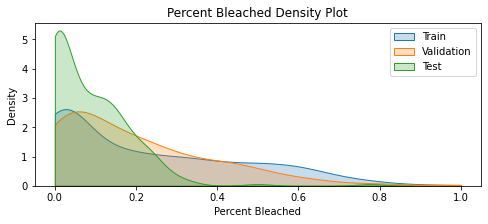

In [17]:
# plotting distribution of y_train and y_val and y_test
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
sns.kdeplot(y_train, shade=True, label='Train', levels=5, clip=(0.0, 1.0))
sns.kdeplot(y_val, shade=True, label='Validation', levels=5, clip=(0.0, 1.0))
sns.kdeplot(y_test, shade=True, label='Test', levels=5, clip=(0.0, 1.0))
plt.xlabel('Percent Bleached')
plt.ylabel('Density')
plt.title('Percent Bleached Density Plot')
plt.legend()
plt.show()

### Investigating the effectivness of the previously trained regressive model

Computing Mean Absolute Error

In [18]:
from sklearn.metrics import mean_absolute_error
print(f'Total Validation Mean Absolute Error = {mean_absolute_error(y_test, xgb_bleaching.predict(X_test)) * 100:.2f}%')
for i in range(0,100,10):
    try:
        print(f'For Actual Bleaching >={i/100* 100:0.0f}%,',f'Validation Mean Absolute Error = {mean_absolute_error(y_test[y_test>=(i/100)], xgb_bleaching.predict(X_test[y_test>=(i/100)])) * 100:.2f}%','- based on',len(X_test[y_test>=(i/100)]),'value(s)')
    except:
        print(f'No values above {i/100* 100:0.0f}%')

Total Validation Mean Absolute Error = 13.47%
For Actual Bleaching >=0%, Validation Mean Absolute Error = 13.47% - based on 197 value(s)
For Actual Bleaching >=10%, Validation Mean Absolute Error = 14.40% - based on 78 value(s)
For Actual Bleaching >=20%, Validation Mean Absolute Error = 18.34% - based on 25 value(s)
For Actual Bleaching >=30%, Validation Mean Absolute Error = 21.35% - based on 4 value(s)
For Actual Bleaching >=40%, Validation Mean Absolute Error = 36.36% - based on 2 value(s)
For Actual Bleaching >=50%, Validation Mean Absolute Error = 36.36% - based on 2 value(s)
For Actual Bleaching >=60%, Validation Mean Absolute Error = 71.48% - based on 1 value(s)
For Actual Bleaching >=70%, Validation Mean Absolute Error = 71.48% - based on 1 value(s)
[20:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1190: Empty dataset at worker: 0
No values above 80%
[20:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/s

In [19]:
pickle.dump(xgb_bleaching, open("./coral_presence_xgb_model_CAR_Reg.pkl", "wb"))

Plotting feature importances

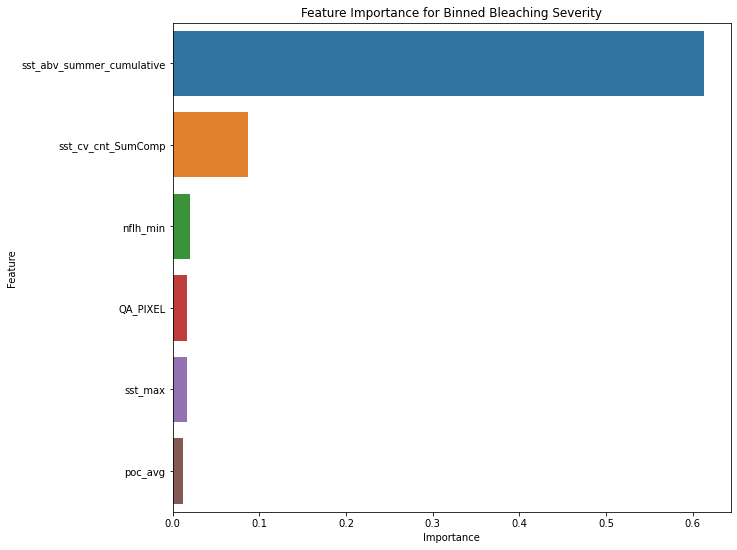

In [20]:
importance = xgb_bleaching.feature_importances_
features = X_train.columns
feature_importance = pd.DataFrame({'feature': features, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(6)
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Binned Bleaching Severity')
plt.show()

## Evaluating Predicted Values as Rankings Instead of Absolute Totals

The following chart displays the raw rankings with the top 10% of rankings highlighted in red

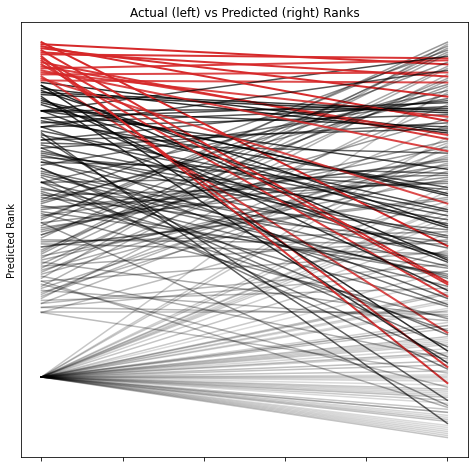

In [21]:
from math import exp

val_preds = xgb_bleaching.predict(X_test)

#preds_rank = val_preds.argsort().argsort()
val_rank = y_test.argsort().argsort()

df_ranks = pd.DataFrame(val_preds,columns=['P_ranks'])
df_ranks['P_ranks'] = df_ranks['P_ranks'].rank()
df_ranks['A_ranks'] = y_test.values
df_ranks['A_ranks'] = df_ranks['A_ranks'].rank()
df_ranks = df_ranks[['A_ranks','P_ranks']]

val_norm = val_rank/val_rank.max()
val_e_norm = .01*val_rank
val_e_norm = val_e_norm.apply(exp)
val_e_norm = val_e_norm/val_e_norm.max()

for i in df_ranks.index:
    if (val_norm.iloc[i] >.9):
        df_ranks.iloc[i].plot(kind='line',alpha=val_e_norm.iloc[i],color='tab:red', figsize=(8,8),linewidth=2, title='Actual (left) vs Predicted (right) Ranks')
    #elif (val_norm.iloc[i] >.8):
    #    ranks.iloc[i].plot(kind='line',alpha=val_norm.iloc[i],color='yellow')
    else: 
        df_ranks.iloc[i].plot(kind='line',alpha=val_e_norm.iloc[i],color='black',figsize=(8,8),ylabel='Predicted Rank')
    
plt.tick_params(left = False,labelleft=False,labelbottom=False)

In [22]:
def k_percentile_accuracy(y_true, y_pred, k):
    """
    Function to compute the accuracy of ranking model predictions
    Input: labels, predictions, desired percentile (k-99)
    Output: Accuracy of rankings from percentile k to 99th percentile
    """
    k = k/100
    n_min = int(len(y_true) * k)
    n_max = len(y_true)
    indices = np.argsort(y_pred)[n_min:n_max]
    true_indices = np.argsort(y_true)[n_min:n_max]
    return len(set(indices) & set(true_indices)) / len(set(true_indices))

Computing ranking accuracy for the model in each decile of bleaching up to the 99th percentile (i.e., 10-99, 20-99, 30-99...) and comparing it with performance of a naive model with random rankings

In [23]:
# getting k_percentile accuracy for every 10th percentile
top_k_accs = {}
for k in range(0, 100, 20):
    top_k_accs[k] = k_percentile_accuracy(y_val, xgb_bleaching.predict(X_val), k)

# simulating what we could get for  top k accuracy by random chance over 1000 runs
import random
random.seed(42)
random_top_k_accs = {}
for run in range(1000):
    for k in range(0, 100, 20):
        random_top_k_accs[k] = random_top_k_accs.get(k, 0) + k_percentile_accuracy(y_test, np.random.rand(len(y_test)), k)

random_top_k_accs = {k: v / 1000 for k, v in random_top_k_accs.items()}

Plotting the decile accuracy of the model vs random ranks to get an idea of the lift

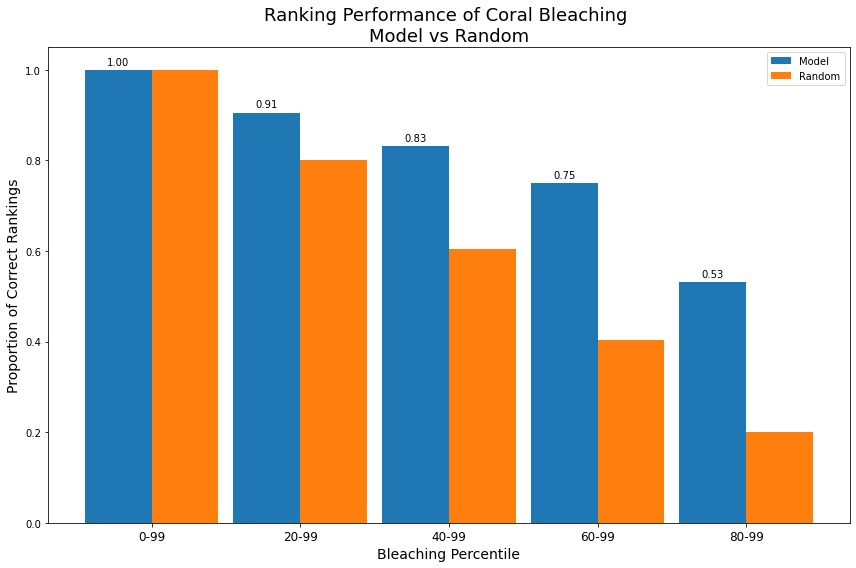

In [24]:
k = [x for x in list(top_k_accs.keys())]
top_k_accs_vals = list(top_k_accs.values())
random_top_k_accs = list(random_top_k_accs.values())
x = np.arange(len(k))
width = 0.45
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
rects1 = ax.bar(x - width/2, top_k_accs_vals, width, label='Model')
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
rects2 = ax.bar(x + width/2, random_top_k_accs, width, label='Random')
ax.set_ylabel('Proportion of Correct Rankings', fontsize=14)
ax.set_xlabel('Bleaching Percentile', fontsize=14)
ax.set_title('Ranking Performance of Coral Bleaching \nModel vs Random', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels([f'{val}-99' for  val in k], fontsize=12)
ax.legend()
fig.tight_layout()
plt.show()

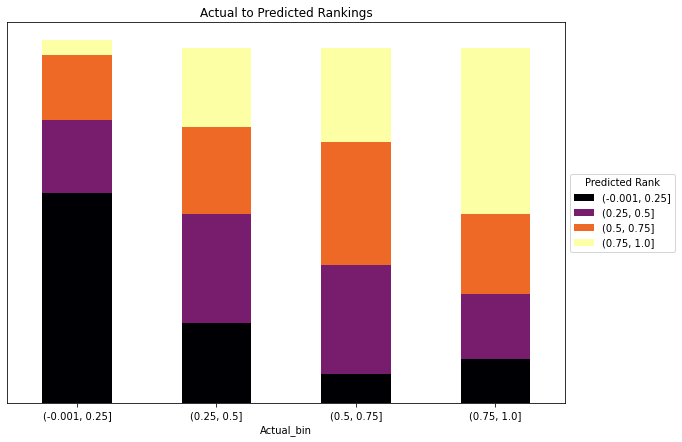

In [25]:
val_preds = xgb_bleaching.predict(X_test)

preds_rank = val_preds.argsort().argsort()
val_rank = y_test.argsort().argsort()

preds_norm = preds_rank/preds_rank.max()
val_norm = val_rank/val_rank.max()

rankings = np.array([val_norm, preds_norm]).transpose()

rank_comp = pd.DataFrame(rankings,columns = ['Actual','Predicted'])
rank_comp['Actual_bin'] = pd.cut(rank_comp['Actual'],bins=4)
rank_comp['Predicted'] = pd.cut(rank_comp['Predicted'],bins=4)

rank_comp = rank_comp.groupby(['Actual_bin','Predicted']).count().unstack('Predicted')
rank_comp.columns = rank_comp.columns.droplevel()

rank_comp.plot.bar(stacked=True,figsize=(10,7),title='Actual to Predicted Rankings', cmap="inferno").legend(title='Predicted Rank',loc='center left',bbox_to_anchor=(1,.5))
plt.tick_params(left = False, labelleft = False,rotation=0)

[Text(0.5, 1.0, 'Actual to Predicted Ranking Heatmap'),
 Text(0.5, 15.0, 'Predicted Bin'),
 Text(33.0, 0.5, 'Actual Bin')]

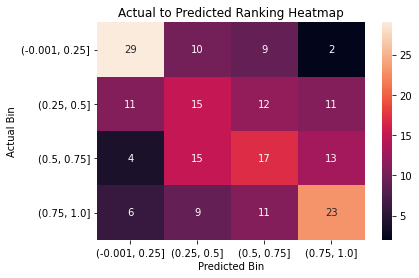

In [26]:
val_preds = xgb_bleaching.predict(X_test)

preds_rank = val_preds.argsort().argsort()
val_rank = y_test.argsort().argsort()

preds_norm = preds_rank/preds_rank.max()
val_norm = val_rank/val_rank.max()

rankings = np.array([val_norm, preds_norm]).transpose()

rank_comp = pd.DataFrame(rankings,columns = ['Actual','Predicted'])
rank_comp['Predicted'] = pd.cut(rank_comp['Predicted'],bins=4)
rank_comp['Actual_bin'] = pd.cut(rank_comp['Actual'],bins=4)
rank_comp = rank_comp.groupby(['Predicted','Actual_bin']).count().unstack('Predicted')
rank_comp.columns = rank_comp.columns.droplevel()
sns.heatmap(rank_comp, annot=True).set(title='Actual to Predicted Ranking Heatmap',xlabel='Predicted Bin',ylabel='Actual Bin')

## Binning Bleaching Severity and Modeling as a Classification Problem
Binning percent bleached into three categories: low, moderate, and severe as shown in the figure

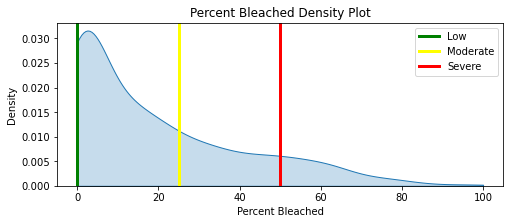

In [27]:
# binning percent bleached data into 3 bins
bins = [-.01,25,50, 100] # we use -0.01 to include 0.0 in the first bin
colors = ['green','yellow', 'red']
labels = ["Low", "Moderate","Severe"]
df_bleaching['Percent_Bleached_Binned'] = pd.cut(df_bleaching['Percent_Bleached_Sum'], bins=bins, labels=labels)
df_bleaching = df_bleaching.dropna()

#plotting the distrbution of percent_bleached_sum_x with the bins we created 
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
sns.kdeplot(df_bleaching['Percent_Bleached_Sum'], shade=True, levels=5, clip=(0.0, 100.0))

# plotting the bins
for i, bin in enumerate(bins):
    if i<3:
        plt.axvline(bin, color=colors[i], linestyle='-', alpha=1, linewidth=3, label=labels[i])
plt.legend()

plt.xlabel('Percent Bleached')
plt.ylabel('Density')
plt.title('Percent Bleached Density Plot')
plt.show()


Looking at the distribution of the binned classes (very imbalanced)

In [28]:
df_bleaching['Percent_Bleached_Binned'].value_counts()

Low         686
Moderate    181
Severe      116
Name: Percent_Bleached_Binned, dtype: int64

Performing **temporal train/validation/test split** and using SMOTE oversampling to handle class imbalance

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTEENN
from sklearn.impute import SimpleImputer

#Original
#features = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10',
#       'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14',
#       'sur_refl_b15', 'sur_refl_b16', 'Blue',
#       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
#       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
#       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI', 'NDWIns',
#       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
#       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
#       'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp', 'datetime_landsat']

#Original + SCNP
features = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10',
       'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14',
       'sur_refl_b15', 'sur_refl_b16', 'Blue',
       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI', 'NDWIns',
       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
            'sst_dhw','sst_dhw_age',
       'chlor_avg', 'chlor_change', 'chlor_max', 'chlor_min',
       'nflh_avg', 'nflh_change', 'nflh_max', 'nflh_min', 
       'poc_avg', 'poc_change', 'poc_max', 'poc_min',
       'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp', 'datetime_landsat']

#Reduced
#features = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10',
#       'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14',
#       'sur_refl_b15', 'sur_refl_b16', 'Blue',
#       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
#       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
#       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI',
#       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
#       'sst_cv_cnt', 'sst_abv_summer_cumulative',
#        'sst_cv_max_SumComp',
#       'sst_dhw','sst_dhw_age',
#       'chlor_avg', 'chlor_change',
#       'nflh_avg', 'nflh_change', 'nflh_max', 'nflh_min',
#       'poc_avg', 'poc_change', 'poc_max', 'poc_min',
#       'datetime_landsat']

X = df_bleaching[features]
y = df_bleaching['Percent_Bleached_Binned']
y = y.replace({'Moderate':1,'Severe': 2, 'Low': 0})

X_train, X_test, y_train, y_test = train_test_split_sorted(X, y, test_size=0.3, dates=X['datetime_landsat'])
X_train, X_val, y_train, y_val = train_test_split_sorted(X_train, y_train, test_size=0.2, dates=X_train['datetime_landsat'])
X_train = X_train.drop(columns=['datetime_landsat'], axis=1)

features.remove('datetime_landsat')
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

# oversampling to balance the data
sm = SMOTE(random_state=42, sampling_strategy='auto')
X_res, y_res = sm.fit_resample(X_train, y_train)

Examining distribution of percent bleached in the training set after SMOTE oversampling

In [30]:
y_res.value_counts()

0    357
1    357
2    357
Name: Percent_Bleached_Binned, dtype: int64

Training XGBoost classifier to predict binned category

In [31]:
from xgboost import XGBClassifier
xgb_bleaching_binned = XGBClassifier(n_estimators=400, max_depth=8, reg_lambda=1, reg_alpha=1)
xgb_bleaching_binned.fit(X_res, y_res, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

[20:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Examining validation accuracy and confusion matrix

In [32]:
from sklearn.metrics import f1_score, precision_score,recall_score
fscore = f1_score(y_test, xgb_bleaching_binned.predict(X_test), average='weighted')
pscore = precision_score(y_test, xgb_bleaching_binned.predict(X_test), average='weighted')
rscore = recall_score(y_test,xgb_bleaching_binned.predict(X_test), average='weighted')
print(f'Accuracy = {xgb_bleaching_binned.score(X_test, y_test)*100:.2f}%')
print(f'Weighted F1 Score = {fscore * 100:.2f}%')
print(f'Weighted Precision Score = {pscore * 100:.2f}%')
print(f'Weighted Recall Score = {rscore * 100:.2f}%')

Accuracy = 68.14%
Weighted F1 Score = 76.13%
Weighted Precision Score = 89.05%
Weighted Recall Score = 68.14%


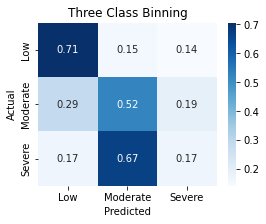

In [33]:
# plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = xgb_bleaching_binned.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_rel = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
sns.heatmap(cm_rel, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Three Class Binning')
plt.show()

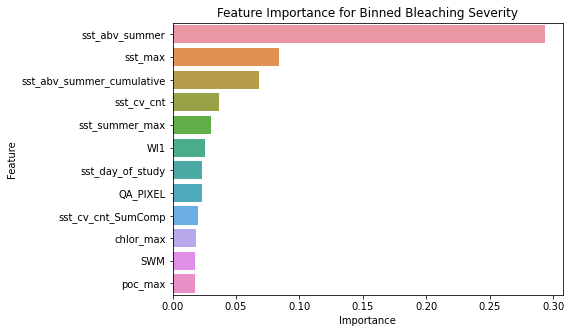

In [34]:
# plotting feature importance using seaborn horizntal bar plot ordered by importance
importance = xgb_bleaching_binned.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(12)
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Binned Bleaching Severity')
plt.show()

In [35]:
y_test.value_counts()

0    268
1     21
2      6
Name: Percent_Bleached_Binned, dtype: int64

## Binning to Two Buckets (Low or Moderate/Severe)

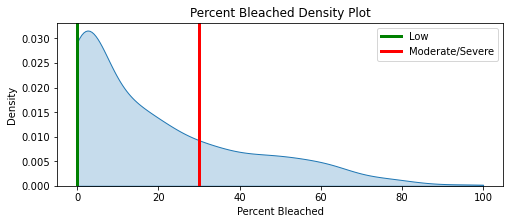

In [36]:
# binning percent bleached data into 3 bins
bins = [-.01,30, 100] # we use -0.01 to include 0.0 in the first bin
colors = ['green', 'red']
labels = ["Low", "Moderate/Severe"]
df_bleaching['Percent_Bleached_Binned'] = pd.cut(df_bleaching['Percent_Bleached_Sum'], bins=bins, labels=labels)
df_bleaching = df_bleaching.dropna()

#plotting the distrbution of percent_bleached_sum_x with the bins we created 
fig, ax = plt.subplots()
fig.set_size_inches(8, 3)
sns.kdeplot(df_bleaching['Percent_Bleached_Sum'], shade=True, levels=5, clip=(0.0, 100.0))

# plotting the bins
for i, bin in enumerate(bins):
    if i<2:
        plt.axvline(bin, color=colors[i], linestyle='-', alpha=1, linewidth=3, label=labels[i])
plt.legend()

plt.xlabel('Percent Bleached')
plt.ylabel('Density')
plt.title('Percent Bleached Density Plot')
plt.show()


Looking at the distribution of the binned classes (very imbalanced)

In [37]:
df_bleaching['Percent_Bleached_Binned'].value_counts()

Low                727
Moderate/Severe    256
Name: Percent_Bleached_Binned, dtype: int64

Performing **temporal train/validation/test split** and using SMOTE oversampling to handle class imbalance

In [38]:
#Original + SCNP
features = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10',
       'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14',
       'sur_refl_b15', 'sur_refl_b16', 'Blue',
       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI',
       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
       'sst_cv_cnt', 'sst_abv_summer', 'sst_abv_summer_cumulative',
       'sst_cv_cnt_SumComp', 'sst_cv_max_SumComp',
       'sst_dhw','sst_dhw_age',
       'chlor_avg', 'chlor_change',
       'nflh_avg', 'nflh_change', 'nflh_max', 'nflh_min',
       'poc_avg', 'poc_change', 'poc_max', 'poc_min',
       'datetime_landsat']

#Reduced
#features = ['sur_refl_b08', 'sur_refl_b09', 'sur_refl_b10',
#       'sur_refl_b11', 'sur_refl_b12', 'sur_refl_b13', 'sur_refl_b14',
#       'sur_refl_b15', 'sur_refl_b16', 'Blue',
#       'Green', 'Red', 'Near Infrared', 'Shortwave Infrared 1',
#       'Shortwave Infrared 2', 'QA_PIXEL', 'AWEInsh', 'AWEIsh', 'LSWI', 'MBWI',
#       'MLSWI26', 'MLSWI27', 'MNDWI', 'MuWIR', 'NDVIMNDWI', 'NDWI',
#       'NWI', 'SWM', 'WI1', 'WI2', 'WRI', 'sst_day_of_study', 'sst_max', 'sst_summer_max', 'sst_cv_max',
#       'sst_cv_cnt', 'sst_abv_summer_cumulative',
#        'sst_cv_cnt_SumComp','sst_cv_max_SumComp',
#       'sst_dhw','sst_dhw_age',
#       'chlor_avg', 'chlor_change',
#       'nflh_avg', 'nflh_change', 'nflh_max', 'nflh_min',
#       'poc_avg', 'poc_change', 'poc_max', 'poc_min',
#       'datetime_landsat']

X = df_bleaching[features]
y = df_bleaching['Percent_Bleached_Binned']
y = y.replace({'Moderate/Severe': 1, 'Low': 0})

X_train, X_test, y_train, y_test = train_test_split_sorted(X, y, test_size=0.2, dates=X['datetime_landsat'])
X_train, X_val, y_train, y_val = train_test_split_sorted(X_train, y_train, test_size=0.2, dates=X_train['datetime_landsat'])
X_train = X_train.drop(columns=['datetime_landsat'], axis=1)

features.remove('datetime_landsat')
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

## oversampling to balance the data
sm = SMOTE(random_state=42, sampling_strategy='auto')
X_res, y_res = sm.fit_resample(X_train, y_train)

Examining distribution of percent bleached in the training set after SMOTE oversampling

In [39]:
y_res.value_counts()

0    410
1    410
Name: Percent_Bleached_Binned, dtype: int64

Training XGBoost classifier to predict binned category

In [40]:
xgb_bleaching_binned = XGBClassifier(n_estimators=400, max_depth=8, reg_lambda=1, reg_alpha=1)
xgb_bleaching_binned.fit(X_res, y_res, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

[20:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
#pickle.dump(xgb_bleaching_binned, open("./coral_presence_xgb_model_CAR_2-Bin.pkl", "wb"))

Examining validation accuracy and confusion matrix

In [42]:
fscore = f1_score(y_test, xgb_bleaching_binned.predict(X_test), average='weighted')
pscore = precision_score(y_test, xgb_bleaching_binned.predict(X_test), average='weighted')
rscore = recall_score(y_test,xgb_bleaching_binned.predict(X_test), average='weighted')
print(f'Accuracy = {xgb_bleaching_binned.score(X_test, y_test)*100:.2f}%')
print(f'Weighted F1 Score = {fscore * 100:.2f}%')
print(f'Weighted Precision Score = {pscore * 100:.2f}%')
print(f'Weighted Recall Score = {rscore * 100:.2f}%')

Accuracy = 72.08%
Weighted F1 Score = 81.59%
Weighted Precision Score = 96.94%
Weighted Recall Score = 72.08%


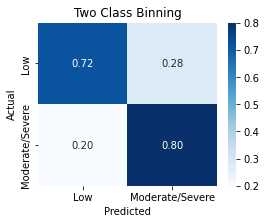

In [43]:
# plotting confusion matrix
y_pred = xgb_bleaching_binned.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_rel = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
sns.heatmap(cm_rel, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Two Class Binning')
plt.show()

#full SST+CNP dataset .2 val/.2 test val scores

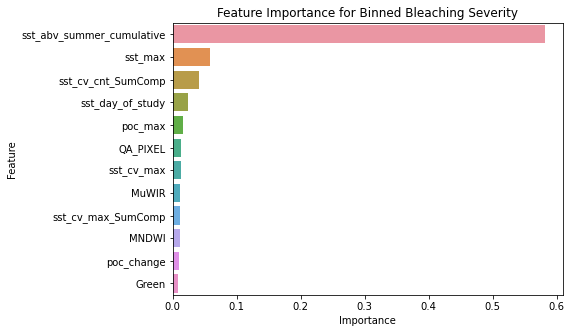

In [44]:
# plotting feature importance using seaborn horizntal bar plot ordered by importance
importance = xgb_bleaching_binned.feature_importances_
feature_importance = pd.DataFrame({'feature': features, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(12)
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Binned Bleaching Severity')
plt.show()

## SHAP Analysis

https://github.com/smazzanti/tds_black_box_models_more_explainable/blob/master/Shap2Probas.ipynb

SHAP values provided the marginal impact of individual featues allowing us see how they impact our model's decisions

In [45]:
def shap2deltaprob(features, 
                   shap_df, 
                   shap_sum,
                   probas,
                   func_shap2probas):
    '''
    map shap to Δ probabilities
    --- input ---
    :features: list of strings, names of features
    :shap_df: pd.DataFrame, dataframe containing shap values
    :shap_sum: pd.Series, series containing shap sum for each observation
    :probas: pd.Series, series containing predicted probability for each observation
    :func_shap2probas: function, maps shap to probability (for example interpolation function)
    --- output ---
    :out: pd.Series or pd.DataFrame, Δ probability for each shap value
    '''
    # 1 feature
    if type(features) == str or len(features) == 1:
        return probas - (shap_sum - shap_df[features]).apply(func_shap2probas)
    # more than 1 feature
    else:
        return shap_df[features].apply(lambda x: shap_sum - x).apply(func_shap2probas)\
                .apply(lambda x: probas - x)
    

def partial_deltaprob(feature, X, shap_df, shap_sum, probas, func_shap2probas,
                      cutoffs = None
                     ):
    '''
    return univariate analysis (count, mean and standard deviation) of shap values based on the original feature
    --- input ---
    :feature: str, name of feature
    :X: pd.Dataframe, shape (N, P)
    :shap_df: pd.DataFrame, shape (N, P)
    :shap_sum: pd.Series, series containing shap sum for each observation
    :probas: pd.Series, series containing predicted probability for each observation
    :func_shap2probas: function, maps shap to probability (for example interpolation function)
    :cutoffs: list of floats, cutoffs for numerical features
    --- output ---
    :out: pd.DataFrame, shape (n_levels, 3)
    '''
    dp_col = shap2deltaprob(feature, shap_df, shap_sum, probas, func_shap2probas)
    dp_col_mean = dp_col.mean()
    dp_col.name = 'DP_' + feature
    out = pd.concat([X[feature], dp_col], axis = 1)
    if cutoffs:
        intervals = pd.IntervalIndex.from_tuples(list(zip(cutoffs[:-1], cutoffs[1:])))
        out[feature] = pd.cut(out[feature], bins = intervals)
        out = out.dropna()   
    out = out.groupby(feature).describe().iloc[:, :3]
    out.columns = ['count', 'mean', 'std']
    out['std'] = out['std'].fillna(0)
    return out



Each row's features converted to SHAP values

In [46]:
from scipy.interpolate import interp1d
import shap

explainer = shap.TreeExplainer(xgb_bleaching_binned)
shap_values = explainer.shap_values(X_train)

### SHAP Summary Plot

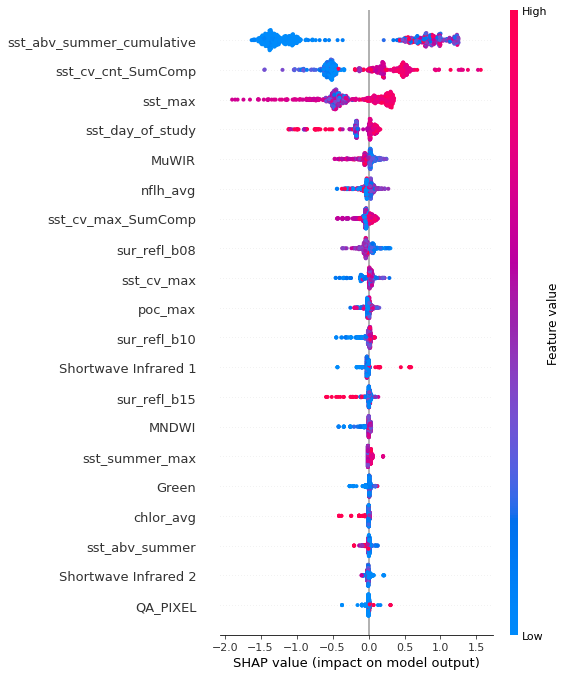

In [47]:
shap.summary_plot(shap_values,X_train)

This plots the "weights" of an individual redord's feature to show how they lead to a "Low" prediction

In [48]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X_val.iloc[1,:])

In [49]:
shap_df = pd.DataFrame(shap_values, columns = features, index=X_train.index)
shap_sum = shap_df.sum(axis=1)

temp = shap_df.head()
temp.style.apply(lambda x:["background:orangered" if v<0 else "background:lightgreen" for v in x], axis = 1)

Each SHAP value is converted to a percent likelihood 

In [50]:
probas = pd.Series(xgb_bleaching_binned.predict_proba(X_train)[:,1],index=X_train.index)

shap_sum_sort = shap_sum.sort_values()
probas_sort = probas[shap_sum_sort.index]

intp = interp1d(shap_sum_sort,
                probas_sort, 
                bounds_error = False, 
                fill_value = (0, 1))

temp = shap2deltaprob(X_train.columns.to_list(),
                      shap_df,
                      shap_sum,
                      probas,
                      func_shap2probas=intp).head()\
        .applymap(lambda x:('+'if x>0 else '')+str(round(x*100,2))+'%')

temp.style.apply(lambda x: ["background:orangered" if float(v[:-1])<0 else "background:lightgreen"
                                for v in x], axis = 1)

By looking at one feature, we can display how the change in that feature correspondes to the marginal increase in predicted probability of either class.

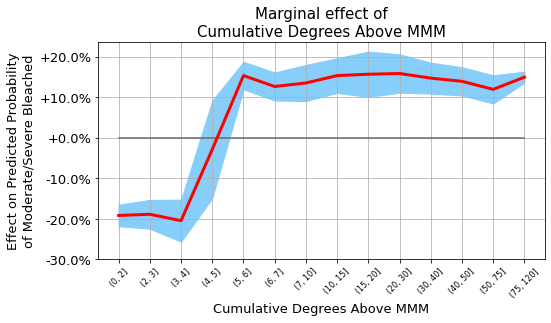

In [51]:
dp = partial_deltaprob('sst_abv_summer_cumulative', X_train, shap_df, shap_sum, probas
                       , func_shap2probas=intp,cutoffs = [0,2,3,4,5,6,7,10,15,20,30,40,50,75,120])

plt.figure(figsize=(8,4))
plt.plot([0,len(dp)-1],[0,0],color='dimgray',zorder=3)
plt.plot(range(len(dp)), dp['mean'], color = 'red', linewidth = 3, label = 'Avg effect',zorder=4)
plt.fill_between(range(len(dp)), dp['mean'] + dp['std'], dp['mean'] - dp['std'],
                 color = 'lightskyblue', label = 'Avg effect +- StDev',zorder=1)
yticks = list(np.arange(-.3,.3,.1))
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.1%}'.format(y) for y in yticks], fontsize=13)
plt.xticks(range(len(dp)), dp.index, fontsize=8,rotation=45)
plt.ylabel('Effect on Predicted Probability\nof Moderate/Severe Bleached',fontsize=13)
plt.xlabel('Cumulative Degrees Above MMM', fontsize=13)
plt.title('Marginal effect of\nCumulative Degrees Above MMM', fontsize=15)
#plt.gca().set_facecolor('lightyellow')

plt.grid(zorder=2)
plt.show()


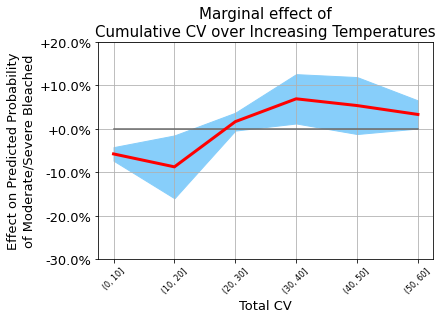

In [52]:
dp = partial_deltaprob('sst_cv_cnt_SumComp', X_train, shap_df, shap_sum, probas
                       , func_shap2probas=intp,cutoffs = [0,10,20,30,40,50,60])

plt.figure(figsize=(6,4))
plt.plot([0,len(dp)-1],[0,0],color='dimgray',zorder=3)
plt.plot(range(len(dp)), dp['mean'], color = 'red', linewidth = 3, label = 'Avg effect',zorder=4)
plt.fill_between(range(len(dp)), dp['mean'] + dp['std'], dp['mean'] - dp['std'],
                 color = 'lightskyblue', label = 'Avg effect +- StDev',zorder=1)
yticks = list(np.arange(-.30,.25,.1))
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.1%}'.format(y) for y in yticks], fontsize=13)
plt.xticks(range(len(dp)), dp.index, fontsize=8,rotation=45)
plt.ylabel('Effect on Predicted Probability\nof Moderate/Severe Bleached',fontsize=13)
plt.xlabel('Total CV', fontsize=13)
plt.title('Marginal effect of\nCumulative CV over Increasing Temperatures', fontsize=15)
#plt.gca().set_facecolor('lightyellow')

plt.grid(zorder=2)
plt.show()


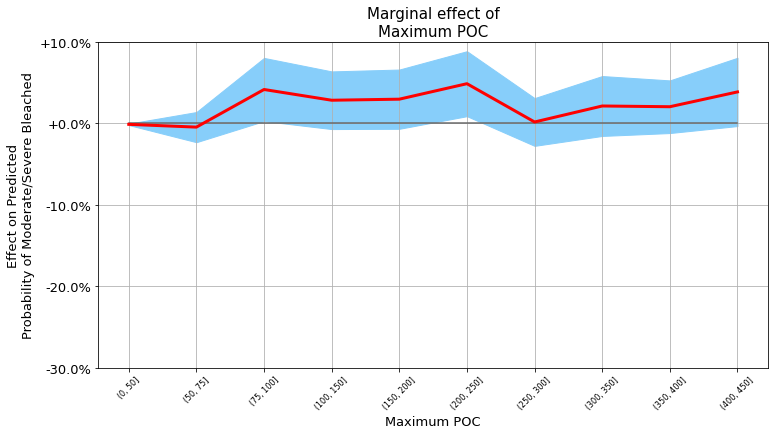

In [53]:
dp = partial_deltaprob('poc_max', X_train, shap_df, shap_sum, probas
                       , func_shap2probas=intp,cutoffs = [0,50,75,100,150,200,250,300,350,400,450])

plt.figure(figsize=(12,6))
plt.plot([0,len(dp)-1],[0,0],color='dimgray',zorder=3)
plt.plot(range(len(dp)), dp['mean'], color = 'red', linewidth = 3, label = 'Avg effect',zorder=4)
plt.fill_between(range(len(dp)), dp['mean'] + dp['std'], dp['mean'] - dp['std'],
                 color = 'lightskyblue', label = 'Avg effect +- StDev',zorder=1)
yticks = list(np.arange(-.3,.20,.1))
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.1%}'.format(y) for y in yticks], fontsize=13)
plt.xticks(range(len(dp)), dp.index, fontsize=8,rotation=45)
plt.ylabel('Effect on Predicted\nProbability of Moderate/Severe Bleached',fontsize=13)
plt.xlabel('Maximum POC', fontsize=13)
plt.title('Marginal effect of\nMaximum POC', fontsize=15)
#plt.gca().set_facecolor('lightyellow')

plt.grid(zorder=2)
plt.show()

<AxesSubplot:>

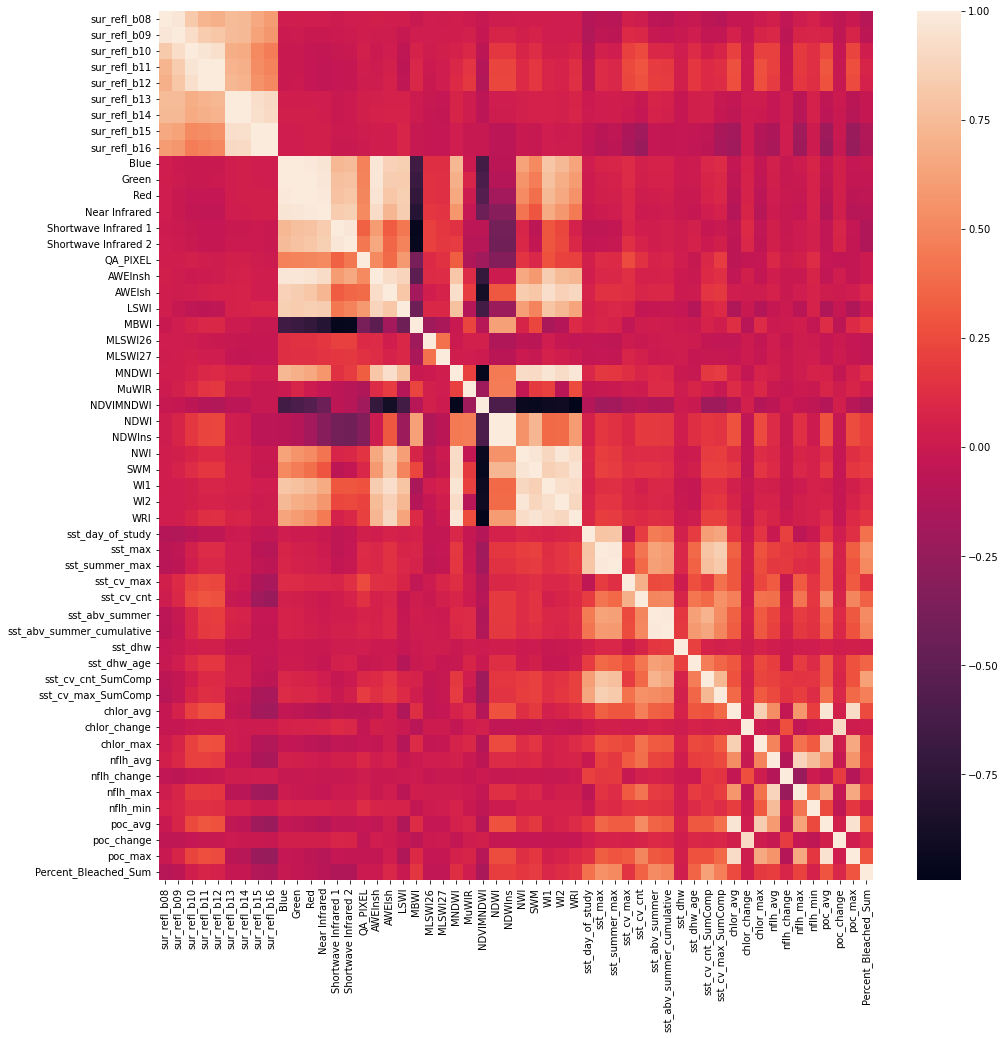

In [54]:
df_bleaching_corr = df_bleaching.drop(columns=['chlor_min','poc_min'])
cor = df_bleaching_corr.corr()
plt.figure(figsize=(16,16))
sns.heatmap(cor,annot=False)